In [1]:
import numpy as np
import os
import random
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import sklearn.datasets, sklearn.decomposition
from matplotlib.transforms import ScaledTranslation
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix


def traintestMNIST(labels=None, ntrain=None, ntest=None, path=os.path.join('data_for_python', 'mnist.npz')):
    mnist = np.load(path)
    train_x = mnist['train_x']
    train_y = mnist['train_y']
    train = np.asarray(list(zip(train_x, train_y)))

    test_x = mnist['test_x']
    test_y = mnist['test_y']
    test = np.asarray(list(zip(test_x, test_y)))

    if labels:
        train = list(train[np.hstack([np.where(train_y==l) for l in labels]).squeeze()])
        test = list(test[np.hstack([np.where(test_y==l) for l in labels]).squeeze()])

    random.shuffle(train)
    random.shuffle(test)

    train_x, train_y = zip(*train)
    test_x, test_y = zip(*test)

    if ntrain:
        train_x = train_x[:ntrain]
        train_y = train_y[:ntrain]

    if ntest:
        test_x = test_x[:ntest]
        test_y = test_y[:ntest]

    return np.asarray(train_x), np.asarray(train_y), np.asarray(test_x), np.asarray(test_y)

In [2]:
[trainImages, trainLabels, testImages, testLabels] = traintestMNIST([3,7], 2000)

In [3]:
def J(x, y, k):
    temp=0
    for j in range(k):
        index_y = np.where(y == j)[0]
        g_j=np.mean(x[index_y],axis=0)
        for i in index_y:
            temp=temp+np.linalg.norm(x[i] - g_j)**2
    return temp

In [4]:
v=[]
for k in np.uint(np.linspace(2,10,9)):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(trainImages)
    v.append(J(trainImages,kmeans.labels_,k))

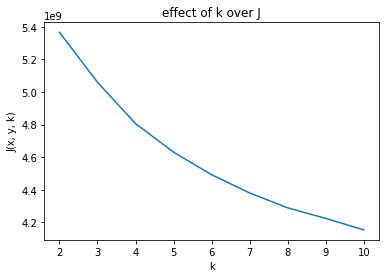

In [5]:
plt.plot(np.linspace(2,10,9),v)
plt.xlabel('k')
plt.ylabel('J(x, y, k)')
plt.title('effect of k over J')
plt.show()

In [6]:
'''kmeans = KMeans(n_clusters=2, random_state=0).fit(trainImages)
kmeans_est=kmeans.predict(testImages)

temp2=np.where(kmeans_est==1)[0]
kmeans_est_bis=np.uint(np.zeros(len(kmeans_est))+3) #trick pr transformer les 0 en 7 et 1 en 3
for i in temp2:
    kmeans_est_bis[i]=7

cm=confusion_matrix(testLabels,kmeans_est_bis)
print(cm)
'''

[[  52  958]
 [1004   24]]


In [7]:
#kmeans_est-testLabels
#print(kmeans_est)

#print(temp2)
#print(kmeans_est)
#print(testLabels)
#print(bb)
#bbb=np.where(bb!=testLabels)
#print(len(kmeans_est))
#print(len(np.where(kmeans_est_bis-testLabels!=0)[0]))


In [8]:
'''[trainImages2, trainLabels2, testImages2, testLabels2] = traintestMNIST([1,8], 2000)
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(trainImages2)
kmeans_est2=kmeans2.predict(testImages2)
temp2_2=np.where(kmeans_est2==1)[0]
kmeans_est_bis2=np.uint(np.zeros(len(kmeans_est2))+8) #trick pr transformer les 0 en 7 et 1 en 3
for i in temp2_2:
    kmeans_est_bis2[i]=1
cm2=confusion_matrix(testLabels2,kmeans_est_bis2)
print(cm2)'''

[[  28 1107]
 [ 892   82]]


In [9]:
'''[trainImages3, trainLabels3, testImages3, testLabels3] = traintestMNIST([3,5], 2000)
kmeans3 = KMeans(n_clusters=2, random_state=0).fit(trainImages3)
kmeans_est3=kmeans3.predict(testImages3)
temp2_3=np.where(kmeans_est3==1)[0]
kmeans_est_bis3=np.uint(np.zeros(len(kmeans_est3))+3) #trick pr transformer les 0 en 7 et 1 en 3
for i in temp2_3:
    kmeans_est_bis3[i]=5
cm3=confusion_matrix(testLabels3,kmeans_est_bis3)
print(cm3)'''

[[323 687]
 [547 345]]


In [10]:
'''[trainImages4, trainLabels4, testImages4, testLabels4] = traintestMNIST([3,5], 2000)

kmeans4 = KMeans(n_clusters=2)
kmeans4.fit(testImages4)

kmeans_est4=kmeans4.predict(testImages4)

cm3=confusion_matrix(testLabels4,kmeans_est4)
print(cm3)'''

[[  0   0   0   0]
 [  0   0   0   0]
 [823 187   0   0]
 [345 547   0   0]]


In [11]:
#print(testLabels4)
#print(kmeans_est4)

In [26]:
'''temp4=np.where(kmeans_est4==1)[0]
kmeans_est_bis4=np.uint(np.zeros(len(kmeans_est4))+3) #trick pr transformer les 0 en 7 et 1 en 3
for i in temp4:
    kmeans_est_bis4[i]=5
cm4=confusion_matrix(testLabels4,kmeans_est_bis4)
print(cm4)'''

'temp4=np.where(kmeans_est4==1)[0]\nkmeans_est_bis4=np.uint(np.zeros(len(kmeans_est4))+3) #trick pr transformer les 0 en 7 et 1 en 3\nfor i in temp4:\n    kmeans_est_bis4[i]=5\ncm4=confusion_matrix(testLabels4,kmeans_est_bis4)\nprint(cm4)'

In [22]:
def g(n1,n2):
    [trainImages4, trainLabels4, testImages4, testLabels4] = traintestMNIST([n1,n2], 2000)
    temp4=np.where(kmeans_est4==1)[0]
    kmeans_est_bis4=np.uint(np.zeros(len(kmeans_est4))+ n1) #trick pr transformer 
    for i in temp4:
        kmeans_est_bis4[i]=n2
    cm4=confusion_matrix(testLabels4,kmeans_est_bis4)
    return cm4

In [17]:
'''cm_3_5=[]
for _ in range(50):
    cm_3_5.append(g(3,5))'''
    


In [25]:
cm_37 = []
for _ in range(50):
    cm_37.append(g(3,5))


In [ ]:
print('Pour matrice de confusion:\n\n  LDA\n\n  1-NN')
print('---------\nmean:\n')
print(np.mean(c,0))
print('---------\nmedian:\n')
print(np.median(c,0))
print('---------\nmin:\n')
print(np.amin(c,0))
print('---------\nmax:\n')
print(np.amax(c,0))